In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# https://www.lequipe.fr/special/Basket/guide/v4/nba-2020-2021/

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/DATASET NBA/NBAGAMES.csv", sep='\t', index_col='GAME_DATE')
df=df.reset_index()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (58,64,65,68,79,93,96,114) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#### STEP 1 -> RESTRICTION DU DATASET AUX 2 DERNIERES ANNEES

In [ ]:
df_quarto = df.iloc[60304:,:] # choix arbitraire de selection des 2 dernières années pour avoir des statistiques non dénuées de sens


In [ ]:
df_quarto.head()

,GAME_DATE,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_DATE_EST,GAME_SEQUENCE,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS,TEAM_CITY_HOME,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,TEAM_CITY_AWAY,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,TEAM_CITY_NAME_HOME,TEAM_NICKNAME_HOME,TEAM_WINS_LOSSES_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,TEAM_CITY_NAME_AWAY,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_CITY,LAST_GAME_HOME_TEAM_NAME,LAST_GAME_HOME_TEAM_ABBREVIATION,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_CITY,LAST_GAME_VISITOR_TEAM_NAME,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
60304,2019-10-22,21900002,22019,1610612746,LAC,LA Clippers,LAC vs. LAL,W,240,42.0,81.0,0.519,11.0,31.0,0.355,17.0,24.0,0.708,11.0,34.0,45.0,24.0,8.0,5.0,14.0,25.0,112,10,1,1610612747,LAL,Los Angeles Lakers,LAL @ LAC,L,240,37.0,85.0,0.435,13.0,33.0,0.394,15.0,21.0,0.714,9.0,32.0,41.0,20.0,4.0,7.0,15.0,24.0,102,-10,1,2019-10-22T00:00:00,2.0,3,Final,20191022/LALLAC,1610612746,1610612747,2019,4.0,NaN,TNT,Q4 - TNT,1.0,LA,42.0,12.0,22.0,14.0,5.0,5.0,0.0,14.0,5.0,17.0,Los Angeles,40.0,6.0,5.0,11.0,5.0,5.0,1.0,15.0,9.0,25.0,0.0,"TUESDAY, OCTOBER 22, 2019",19068.0,2:28,LA,Clippers,1-0,22.0,40.0,23.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,Los Angeles,Lakers,0-1,25.0,29.0,31.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21801192.0,2019-04-05T00:00:00,1.610613e+09,LA,Clippers,LAC,117.0,1.610613e+09,Los Angeles,Lakers,LAL,122.0,2.0,2.0,Tied,1.0,1.0,1.0,1.0,0.0
60305,2019-10-22,21900001,22019,1610612761,TOR,Toronto Raptors,TOR vs. NOP,W,265,42.0,103.0,0.408,14.0,40.0,0.350,32.0,38.0,0.842,16.0,41.0,57.0,23.0,7.0,3.0,17.0,24.0,130,8,1,1610612740,NOP,New Orleans Pelicans,NOP @ TOR,L,265,43.0,102.0,0.422,19.0,45.0,0.422,17.0,20.0,0.850,16.0,37.0,53.0,30.0,4.0,9.0,19.0,34.0,122,-8,1,2019-10-22T00:00:00,1.0,3,Final,20191022/NOPTOR,1610612761,1610612740,2019,5.0,NaN,TNT,Q5 - TNT,1.0,Toronto,56.0,19.0,20.0,8.0,15.0,14.0,1.0,17.0,15.0,20.0,New Orleans,38.0,9.0,13.0,11.0,15.0,14.0,0.0,19.0,4.0,22.0,0.0,"TUESDAY, OCTOBER 22, 2019",20787.0,2:50,Toronto,Raptors,1-0,27.0,29.0,32.0,29.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,New Orleans,Pelicans,0-1,30.0,31.0,25.0,31.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21800983.0,2019-03-08T00:00:00,1.610613e+09,Toronto,Raptors,TOR,127.0,1.610613e+09,New Orleans,Pelicans,NOP,104.0,2.0,0.0,Toronto,1.0,1.0,1.0,1.0,0.0
60306,2019-10-23,21900008,22019,1610612755,

In [ ]:
#### STEP 2 : Nettoyage + reformatage DATASET

# 21 10 21 -> Pour cette analyse orientée EDA par équipe, on conserve une partie des variables non conservées pour les 1eres modelisation (notebooks 2 et 3)
# au moins dans un premier temps

In [ ]:
### df_quarto['GAME_DATE'] = pd.to_datetime(df_quarto['GAME_DATE'], format= '%Y/%m/%d')

In [ ]:
df_quarto['GAME_DATE'] = pd.to_datetime(df_quarto['GAME_DATE'], format= '%Y/%m/%d')
df_quarto['day_of_week'] = df_quarto['GAME_DATE'].dt.day_name ()
#df_quarto['day_of_week'] = df_quarto['GAME_DATE'].dt.weekday
#df['hour_of_day'] = df['GAME_TIME'].dt.hour
df_quarto['WL_HOME'] = df_quarto['WL_HOME'].map({'W':1, 'L':0})
df_quarto['WL_AWAY'] = df_quarto['WL_AWAY'].map({'W':1, 'L':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# REMPLACEMENT DES VALEURS MANQUANTES NAN DE TYPE NUMERIC PAR LEUR MOYENNE
num_column=[col for col in df_quarto.columns if df_quarto[col].dtype in ['int64','float64']]
column_means = df_quarto[num_column]. mean()
for col in df_quarto:
  df_quarto = df_quarto.fillna(column_means)

In [ ]:
# Nettoyage des lignes manquantes (données manquantes object)
#df_quarto = df_quarto.dropna(axis=0)

In [ ]:
# creation nouvelle variable (temps entre 2 matchs)
df_quarto['GAME_DATE'] = pd.to_datetime(df_quarto.GAME_DATE)
df_quarto['LAST_GAME_DATE_EST'] = pd.to_datetime(df_quarto.LAST_GAME_DATE_EST)
df_quarto['TimeBtw2Games'] = df_quarto['GAME_DATE'] - df_quarto['LAST_GAME_DATE_EST']

In [ ]:
#### STEP 3 : CREATION DE 2 DATAFRAMES HOME & AWAY

point technique du 20/10/2021
CONSEIL YOHAN -> fournir pour chaque match de nos sets train et test des données d'avant match, des moyennes sur les X derniers matchs pour toute les variables quantitatives sélectionnées ( donc à domicile/extérieur peut être sur les données des face à face directement,

 DEFINITION DES DONNEES D'AVANT MATCH
 -> STATS PAR EQUIPES

In [ ]:
df_quarto.sample(5)

,GAME_DATE,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_DATE_EST,GAME_SEQUENCE,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS,TEAM_CITY_HOME,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,TEAM_CITY_AWAY,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,TEAM_CITY_NAME_HOME,TEAM_NICKNAME_HOME,TEAM_WINS_LOSSES_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,TEAM_CITY_NAME_AWAY,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_CITY,LAST_GAME_HOME_TEAM_NAME,LAST_GAME_HOME_TEAM_ABBREVIATION,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_CITY,LAST_GAME_VISITOR_TEAM_NAME,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS,day_of_week,TimeBtw2Games
60727,2019-12-20,21900424,22019,1610612748,MIA,Miami Heat,MIA vs. NYK,1.0,240,43.0,77.0,0.558,18.0,38.0,0.474,25.0,34.0,0.735,9.0,42.0,51.0,34.0,6.0,3.0,18.0,22.0,129,15,1,1610612752,NYK,New York Knicks,NYK @ MIA,0.0,240,41.0,94.0,0.436,10.0,34.0,0.294,22.0,33.0,0.667,13.0,28.0,41.0,23.0,11.0,2.0,8.0,25.0,114,-15,1,2019-12-20T00:00:00,5.0,3,Final,20191220/NYKMIA,1610612748,1610612752,2019,4.0,NaN,NaN,Q4 -,1.0,Miami,42.0,16.0,10.0,34.0,0.0,1.0,1.0,18.0,6.0,26.0,New York,44.0,17.0,10.0,0.0,0.0,1.0,0.0,8.0,9.0,6.0,0.0,"FRIDAY, DECEMBER 20, 2019",19704.0,2:14,Miami,Heat,21-8,39.0,31.0,28.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.000000,New York,Knicks,7-22,20.0,27.0,27.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21801141.0,2019-03-30,1.610613e+09,Miami,Heat,MIA,100.0,1.610613e+09,New York,Knicks,NYK,92.0,1.0,1.0,Tied,1.0,1.0,1.0,1.0,0.0,Friday,265 days
62001,2021-03-23,22000663,22020,1610612740,NOP,New Orleans Pelicans,NOP vs. LAL,1.0,240,47.0,90.0,0.522,10.0,29.0,0.345,24.0,26.0,0.923,11.0,42.0,53.0,28.0,9.0,3.0,14.0,24.0,128,17,1,1610612747,LAL,Los Angeles Lakers,LAL @ NOP,0.0,240,36.0,85.0,0.424,18.0,37.0,0.486,21.0,30.0,0.700,6.0,28.0,34.0,25.0,10.0,4.0,13.0,17.0,111,-17,1,2021-03-23T00:00:00,3.0,3,Final,20210323/LALNOP,1610612740,1610612747,2020,4.0,,TNT,Q4 - TNT,1.0,New Orleans,62.0,16.0,18.0,30.0,5.0,4.0,1.0,14.0,6.0,15.0,Los Angeles,32.0,13.0,10.0,5.0,5.0,4.0,0.0,13.0,10.0,14.0,0.0,"TUESDAY, MARCH 23, 2021",3700.0,2:30,New Orleans,Pelicans,19-24,32.0,27.0,43.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.000000,Los Angeles,Lakers,28-16,29.0,17.0,30.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000187.0,2021-01-15,1.610613e+09,New Orleans,Pelicans,NOP,95.0,1.610613e+09,Los Angeles,Lakers,LAL,112.0,1.0,1.0,Tied,1.0,1.0,0.0,1.0,0.0,Tuesday,67 day

In [ ]:
# Creation dataframe AWAY

In [ ]:
df_away = df_quarto.drop(['WL_HOME','MIN_HOME','FGM_HOME','FGA_HOME','FG_PCT_HOME','FG3M_HOME','FG3A_HOME','FG3_PCT_HOME','FTM_HOME','FTA_HOME','FT_PCT_HOME','OREB_HOME','DREB_HOME','REB_HOME','AST_HOME',
                          'STL_HOME','BLK_HOME','TOV_HOME','PF_HOME','PTS_HOME','PLUS_MINUS_HOME','VIDEO_AVAILABLE_HOME','GAME_DATE_EST','GAME_STATUS_ID','GAMECODE','HOME_TEAM_ID','VISITOR_TEAM_ID','SEASON',
                          'LIVE_PERIOD','LIVE_PERIOD_TIME_BCAST','WH_STATUS','TEAM_CITY_HOME','TEAM_CITY_AWAY','PTS_PAINT_HOME','PTS_2ND_CHANCE_HOME','PTS_FB_HOME','LARGEST_LEAD_HOME','LEAD_CHANGES_HOME',
                          'TIMES_TIED_HOME','TEAM_TURNOVERS_HOME','TOTAL_TURNOVERS_HOME','TEAM_REBOUNDS_HOME','PTS_OFF_TO_HOME','LEAGUE_ID','TEAM_CITY_NAME_HOME','TEAM_NICKNAME_HOME','TEAM_CITY_NAME_AWAY',
                          'TEAM_NICKNAME_HOME','TEAM_WINS_LOSSES_HOME','PTS_QTR1_HOME','PTS_QTR2_HOME','PTS_QTR3_HOME','PTS_QTR4_HOME','PTS_OT1_HOME','PTS_OT2_HOME','PTS_OT3_HOME','PTS_OT4_HOME','PTS_OT5_HOME',
                          'PTS_OT6_HOME','PTS_OT7_HOME','PTS_OT8_HOME','PTS_OT9_HOME','PTS_OT10_HOME','LAST_GAME_ID','LAST_GAME_DATE_EST','LAST_GAME_HOME_TEAM_ID','LAST_GAME_HOME_TEAM_CITY','LAST_GAME_HOME_TEAM_NAME',
                          'LAST_GAME_HOME_TEAM_ABBREVIATION','LAST_GAME_VISITOR_TEAM_ID','LAST_GAME_VISITOR_TEAM_CITY','LAST_GAME_VISITOR_TEAM_NAME','LAST_GAME_VISITOR_TEAM_CITY1','VIDEO_AVAILABLE_FLAG','PT_AVAILABLE',
                          'PT_XYZ_AVAILABLE','HUSTLE_STATUS','HISTORICAL_STATUS','LIVE_PC_TIME','NATL_TV_BROADCASTER_ABBREVIATION'],axis=1)
                         

In [ ]:
df_away.head()

,GAME_DATE,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,MATCHUP_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_SEQUENCE,GAME_STATUS_TEXT,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,PTS_HOME_y,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,day_of_week,TimeBtw2Games
60304,2019-10-22,21900002,22019,1610612746,LAC,LA Clippers,LAC vs. LAL,1610612747,LAL,Los Angeles Lakers,LAL @ LAC,0.0,240,37.0,85.0,0.435,13.0,33.0,0.394,15.0,21.0,0.714,9.0,32.0,41.0,20.0,4.0,7.0,15.0,24.0,102,-10,1,2.0,Final,40.0,6.0,5.0,11.0,5.0,5.0,1.0,15.0,9.0,25.0,"TUESDAY, OCTOBER 22, 2019",19068.0,2:28,112.0,Lakers,0-1,25.0,29.0,31.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,122.0,2.0,2.0,Tied,Tuesday,200 days
60305,2019-10-22,21900001,22019,1610612761,TOR,Toronto Raptors,TOR vs. NOP,1610612740,NOP,New Orleans Pelicans,NOP @ TOR,0.0,265,43.0,102.0,0.422,19.0,45.0,0.422,17.0,20.0,0.850,16.0,37.0,53.0,30.0,4.0,9.0,19.0,34.0,122,-8,1,1.0,Final,38.0,9.0,13.0,11.0,15.0,14.0,0.0,19.0,4.0,22.0,"TUESDAY, OCTOBER 22, 2019",20787.0,2:50,130.0,Pelicans,0-1,30.0,31.0,25.0,31.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,104.0,2.0,0.0,Toronto,Tuesday,228 days
60306,2019-10-23,21900008,22019,1610612755,PHI,Philadelphia 76ers,PHI vs. BOS,1610612738,BOS,Boston Celtics,BOS @ PHI,0.0,240,33.0,90.0,0.367,7.0,26.0,0.269,20.0,34.0,0.588,10.0,31.0,41.0,18.0,4.0,2.0,11.0,29.0,93,-14,1,6.0,Final,44.0,14.0,8.0,8.0,6.0,8.0,1.0,11.0,13.0,11.0,"WEDNESDAY, OCTOBER 23, 2019",20422.0,2:33,107.0,Celtics,0-1,25.0,23.0,20.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,115.0,3.0,1.0,Philadelphia,Wednesday,217 days
60307,2019-10-23,21900010,22019,1610612759,SAS,San Antonio Spurs,SAS vs. NYK,1610612752,NYK,New York Knicks,NYK @ SAS,0.0,240,44.0,94.0,0.468,10.0,30.0,0.333,13.0,18.0,0.722,5.0,34.0,39.0,24.0,16.0,1.0,14.0,32.0,111,-9,1,8.0,Final,58.0,4.0,29.0,7.0,9.0,4.0,0.0,14.0,7.0,16.0,"WEDNESDAY, OCTOBER 23, 2019",18354.0,2:15,120.0,Knicks,0-1,15.0,36.0,33.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,83.0,2.0,0.0,San Antonio,Wednesday,222 days
60308,2019-10-23,21900012,22019,1610612756,PHX,Phoenix Suns,PHX vs. SAC,1610612758,SAC,Sacramento Kings,SAC @ PHX,0.0,240,34.0,87.0,0.391,10.0,29.0,0.345,17.0,26.0,0.654,12.0,35.0,47.0,17.0,5.0,5.0,27.0,24.0,95,-29,1,10.0,Final,34.0,15.0,11.0,11.0,7.0,9.0,1.0,27.0,10.0,35.0,"WEDNESDAY, OCTOBER 23, 2019",18055.0,2:19,124.0,Kings,0-1,29.0,30.0,17.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,105.0,2.0,2.0,Tied,Wednesday,13 days


In [ ]:
d = df_away.groupby(['TEAM_ABBREVIATION_AWAY'])
d.sample(10)

,GAME_DATE,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,MATCHUP_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_SEQUENCE,GAME_STATUS_TEXT,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,PTS_HOME_y,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,day_of_week,TimeBtw2Games
60704,2019-12-17,21900403,22019,1610612752,NYK,New York Knicks,NYK vs. ATL,1610612737,ATL,Atlanta Hawks,ATL @ NYK,0.000000,240,45.0,99.0,0.455,15.0,43.0,0.349,15.0,20.0,0.750,9.0,27.0,36.0,20.0,7.0,3.0,11.0,21.0,120,-23,1,3.0,Final,52.000000,10.000000,12.000000,3.000000,1.000000,5.000000,1.000000,11.000000,11.000000,18.000000,"TUESDAY, DECEMBER 17, 2019",18268.000000,2:10,143.000000,Hawks,6-22,27.000000,26.000000,31.000000,36.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.000000,100.000000,2.000000,1.000000,New York,Tuesday,62 days
61240,2020-03-06,21900930,22019,1610612764,WAS,Washington Wizards,WAS vs. ATL,1610612737,ATL,Atlanta Hawks,ATL @ WAS,0.000000,240,46.0,86.0,0.535,12.0,32.0,0.375,8.0,12.0,0.667,6.0,30.0,36.0,25.0,9.0,4.0,18.0,25.0,112,-6,1,1.0,Final,56.000000,10.000000,21.000000,5.000000,13.000000,11.000000,1.000000,18.000000,8.000000,8.000000,"FRIDAY, MARCH 6, 2020",17856.000000,2:18,118.000000,Hawks,19-45,34.000000,23.000000,18.000000,37.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.000000,152.000000,2.000000,1.000000,Washington,Friday,40 days
61975,2021-03-20,22000640,22020,1610612747,LAL,Los Angeles Lakers,LAL vs. ATL,1610612737,ATL,Atlanta Hawks,ATL @ LAL,1.000000,240,39.0,98.0,0.398,13.0,37.0,0.351,8.0,9.0,0.889,16.0,33.0,49.0,26.0,13.0,7.0,8.0,21.0,99,5,1,1.0,Final,46.000000,17.000000,2.000000,14.000000,5.000000,10.000000,0.000000,8.000000,4.000000,5.000000,"SATURDAY, MARCH 20, 2021",13062.091801,2:09,94.000000,Hawks,22-20,28.000000,24.000000,22.000000,25.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.000000,99.000000,1.000000,1.000000,Tied,Saturday,47 days
61883,2021-03-03,22000544,22020,1610612753,ORL,Orlando Magic,ORL vs. ATL,1610612737,ATL,Atlanta Hawks,ATL @ ORL,1.000000,240,38.0,85.0,0.447,21.0,45.0,0.467,18.0,19.0,0.947,6.0,36.0,42.0,26.0,7.0,5.0,12.0,25.0,115,3,1,5.0,Final,20.000000,11.000000,17.000000,3.000000,3.000000,1.000000,0.000000,12.000000,6.000000,13.000000,"WEDNESDAY, MARCH 3, 2021",3969.000000,2:17,112.000000,Hawks,16-20,27.000000,15.000000,36.000000,37.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.000000,116.000000,0.000000,1.000000,Atlanta,Wednesday,80 days
61036,2020-02-01,21900733,22019,1610612742,DAL,Dallas Mavericks,DAL vs. ATL,1610612737,ATL,Atlanta Hawks,ATL @ DAL,0.000000,240,37.0,91.0,0.407,10.0,33.0,0.303,16.0,21.0,0.762,10.0,40.0,50.0,19.0,6.0,4.0,11.0,15.0,100,-23,1,7.0,Final,48.000000,14.000000,23.000000,10.000000,1.000000,1.000000,0.000000,11.000000,5.000000,17.000000,"SATURDAY, FEBRUARY 1, 2020",20328.000000,2:03,123.000000,Hawks,13-37,26.000000,23.000000,23.000000,28.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.000000,107.000000,1.000000,1.000000,Tied,Saturday,416 days
60751,2019-12-23,21900444,22019,1610612739,CLE,Cleveland Cavaliers,CLE vs. ATL,1610612737,ATL,Atlanta Hawks,ATL @ CLE,0.000000,240,45.0,95.0,0.474,15.0,42.0,0.357,13.0,17.0,0.765,5.0,32.0,37.0,23.0,11.0,7.0,16.0,20.0,118,-3,1,1.0,Final,46.000000,7.000000,12.0000

In [ ]:
# SELECTION DES EQUIPES PAR ORDRE ALPHABETIQUE

In [ ]:
a = d.get_group('ATL') # ATLANTA HAWKS
a_sel = a.iloc[-6: , :]
ATL_stats_5_Home = a_sel.describe().iloc[1:2,:]
b = d.get_group('BKN') # BROOKLYN NETS
b_sel = b.iloc[-6: , :]
BKN_stats_5_Home = b_sel.describe().iloc[1:2,:]
c = d.get_group('BOS') # BOSTON CELTICS
c_sel = c.iloc[-6: , :]
BOS_stats_5_Home = c_sel.describe().iloc[1:2,:]
d2 = d.get_group('CHA') # CHARLOTTE HORNETS
d_sel = d2.iloc[-6: , :]
CHA_stats_5_Home = d_sel.describe().iloc[1:2,:]
e = d.get_group('CHI') # CHICAGO BULLS
e_sel = d2.iloc[-6: , :]
CHI_stats_5_Home = e_sel.describe().iloc[1:2,:]
f = d.get_group('CLE') # CLEVELAND CAVALIERS
f_sel = f.iloc[-6: , :]
CLE_stats_5_Home = f_sel.describe().iloc[1:2,:]
g = d.get_group('DAL') # DALLAS MAVERICKS
DAL_stats_5_Home = g.iloc[-6: , :].describe().iloc[1:2,:]
h = d.get_group('DEN') # DENVER NUGGETS
DEN_stats_5_Home = h.iloc[-6: , :].describe().iloc[1:2,:]
i = d.get_group('DET') # DETROIT PISTONS
DET_stats_5_Home = i.iloc[-6: , :].describe().iloc[1:2,:]
j = d.get_group('GSW') # GOLDEN STATES WARRIOR
GSW_stats_5_Home = j.iloc[-6: , :].describe().iloc[1:2,:]
k = d.get_group('HOU') # HOUSTON ROCKETS
HOU_stats_5_Home = k.iloc[-6: , :].describe().iloc[1:2,:]
l = d.get_group('IND') # INDIANA PACERS
IND_stats_5_Home = l.iloc[-6: , :].describe().iloc[1:2,:]
m = d.get_group('LAC') # LOS ANGELES CLIPPERS
LAC_stats_5_Home = m.iloc[-6: , :].describe().iloc[1:2,:]
n = d.get_group('LAL') # LOS ANGELES LAKERS
LAL_stats_5_Home = n.iloc[-6: , :].describe().iloc[1:2,:]
o = d.get_group('MEM') # MEMPHIS GRIZZLIES
MEM_stats_5_Home = o.iloc[-6: , :].describe().iloc[1:2,:]
p = d.get_group('MIA') # MIAMI HEATS
MIA_stats_5_Home = p.iloc[-6: , :].describe().iloc[1:2,:]
q = d.get_group('MIL') # MILWAUKEE BUCKS
MIL_stats_5_Home = q.iloc[-6: , :].describe().iloc[1:2,:]
r = d.get_group('MIN') # Minnesota Timberwolves
MIN_stats_5_Home = r.iloc[-6: , :].describe().iloc[1:2,:]
s = d.get_group('NOP') # New Orleans Pelicans	
NOP_stats_5_Home = s.iloc[-6: , :].describe().iloc[1:2,:]
t = d.get_group('NYK') # New York Knicks		
NYK_stats_5_Home = t.iloc[-6: , :].describe().iloc[1:2,:]
t = d.get_group('OKC') # Oklahoma City Thunder			
OKC_stats_5_Home = t.iloc[-6: , :].describe().iloc[1:2,:]
u = d.get_group('ORL') # Orlando Magic			
ORL_stats_5_Home = u.iloc[-6: , :].describe().iloc[1:2,:]
v = d.get_group('PHI') # Philadelphia 76ers			
PHI_stats_5_Home = v.iloc[-6: , :].describe().iloc[1:2,:]
w = d.get_group('PHX') # Phoenix Suns		
PHX_stats_5_Home = w.iloc[-6: , :].describe().iloc[1:2,:]
x = d.get_group('POR') # Portland Trail Blazers	
POR_stats_5_Home = x.iloc[-6: , :].describe().iloc[1:2,:]
y = d.get_group('SAC') # Sacramento Kings	
SAC_stats_5_Home = y.iloc[-6: , :].describe().iloc[1:2,:]
z = d.get_group('SAS') # San Antonio Spurs	
SAS_stats_5_Home = z.iloc[-6: , :].describe().iloc[1:2,:]
aa = d.get_group('TOR') # Toronto Raptors
TOR_stats_5_Home = aa.iloc[-6: , :].describe().iloc[1:2,:]
bb = d.get_group('UTA') # Utah Jazz
UTA_stats_5_Home = bb.iloc[-6: , :].describe().iloc[1:2,:]
cc = d.get_group('WAS') # Washington Wizards
WAS_stats_5_Home = bb.iloc[-6: , :].describe().iloc[1:2,:]

In [ ]:
# Concatenation de tous les sous ensembles 

In [ ]:
Concat2=pd.concat([ATL_stats_5_Home, BKN_stats_5_Home, BOS_stats_5_Home, CHA_stats_5_Home, CHI_stats_5_Home, CLE_stats_5_Home, DAL_stats_5_Home,DEN_stats_5_Home,
DET_stats_5_Home, GSW_stats_5_Home, HOU_stats_5_Home,IND_stats_5_Home, LAC_stats_5_Home, LAL_stats_5_Home, MEM_stats_5_Home,MIA_stats_5_Home,
MIL_stats_5_Home, MIN_stats_5_Home, NOP_stats_5_Home, NYK_stats_5_Home, OKC_stats_5_Home, ORL_stats_5_Home, PHI_stats_5_Home, PHX_stats_5_Home,
POR_stats_5_Home, SAC_stats_5_Home, SAS_stats_5_Home, TOR_stats_5_Home, UTA_stats_5_Home, WAS_stats_5_Home]).drop(['GAME_ID','SEASON_ID','TEAM_ID_HOME'], axis=1)
Concat2

,TEAM_ID_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_SEQUENCE,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_HOME_y,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,TimeBtw2Games
mean,1.610613e+09,0.166667,244.166667,38.833333,88.000000,0.437833,10.000000,29.166667,0.335333,18.000000,23.000000,0.790500,11.333333,30.666667,42.000000,21.833333,6.833333,4.333333,14.166667,18.166667,105.666667,-15.333333,1.000000,3.000000,49.666667,13.333333,12.000000,7.166667,6.000000,3.500000,0.666667,14.166667,8.833333,17.500000,4234.681967,112.702924,26.500000,27.166667,28.000000,23.166667,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.000000,113.333333,1.500000,1.333333,53 days 12:00:00
mean,1.610613e+09,0.409537,220.000000,40.333333,83.666667,0.493167,14.000000,35.000000,0.404667,17.333333,21.833333,0.807833,8.833333,35.333333,44.166667,23.666667,5.166667,4.166667,12.166667,17.833333,112.000000,0.166667,0.833333,3.166667,38.333333,12.833333,11.166667,11.666667,6.333333,5.500000,0.333333,12.333333,6.000000,14.166667,5283.681967,112.702924,32.166667,28.666667,33.000000,19.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.833333,115.000000,1.000000,1.166667,61 days 16:00:00
mean,1.610613e+09,0.333333,240.000000,39.500000,92.000000,0.428500,14.500000,41.500000,0.346667,14.000000,18.000000,0.767333,10.333333,34.500000,44.833333,20.833333,6.666667,6.500000,12.000000,19.500000,107.500000,-0.500000,1.000000,2.000000,44.666667,13.333333,12.000000,11.833333,5.166667,3.500000,0.333333,12.000000,9.666667,14.166667,4786.848633,112.702924,28.000000,22.833333,30.000000,26.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.000000,113.333333,1.166667,1.500000,35 days 20:00:00
mean,1.610613e+09,0.166667,244.166667,37.500000,90.666667,0.415000,12.000000,38.333333,0.312167,16.333333,21.500000,0.717833,11.833333,30.666667,42.500000,26.833333,6.333333,3.833333,11.166667,17.000000,103.333333,-8.166667,1.000000,3.166667,45.333333,14.333333,9.166667,6.166667,4.666667,4.000000,0.500000,11.166667,8.666667,13.166667,4196.181967,112.702924,28.000000,25.333333,27.166667,22.000000,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.666667,110.333333,1.333333,1.333333,44 days 12:00:00
mean,1.610613e+09,0.166667,244.166667,37.500000,90.666667,0.415000,12.000000,38.333333,0.312167,16.333333,21.500000,0.717833,11.833333,30.666667,42.500000,26.833333,6.333333,3.833333,11.166667,17.000000,103.333333,-8.166667,1.000000,3.166667,45.333333,14.333333,9.166667,6.166667,4.666667,4.000000,0.500000,11.166667,8.666667,13.166667,4196.181967,112.702924,28.000000,25.333333,27.166667,22.000000,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.666667,110.333333,1.333333,1.333333,44 days 12:00:00
mean,1.610613e+09,0.000000,240.000000,37.666667,82.166667,0.459500,9.666667,33.166667,0.293167,17.000000,22.166667,0.774167,9.833333,32.333333,42.166667,22.833333,5.500000,2.666667,16.333333,19.000000,102.000000,-13.333333,1.000000,4.500000,50.666667,14.333333,8.166667,5.833333,7.333333,5.333333,0.833333,16.333333,9.666667,21.333333,3190.833333,112.702924,25.166667,26.833333,24.333333,25.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.500000,108.333333,1.500000,0.833333,185 days 16:00:00
mean,1.610613e+09,0.576204,230.000000,42.666667,86.833333,0.492333,15.666667,37.000000,0.427500,16.000000,18.500000,0.857333,9.666667,29.666667,39.333333,25.666667,7.000000,4.000000,12.666667,18.666667,117.000000,7.833333,0.833333,5.500000,39.666

In [ ]:
#ATL_stats_5_Home, BKN_stats_5_Home, BOS_stats_5_Home, CHA_stats_5_Home, CHI_stats_5_Home, CLE_stats_5_Home, DAL_stats_5_Home,DEN_stats_5_Home,
#DET_stats_5_Home, GSW_stats_5_Home, HOU_stats_5_Home,IND_stats_5_Home, LAC_stats_5_Home, LAL_stats_5_Home, MEM_stats_5_Home,MIA_stats_5_Home,
#MIL_stats_5_Home, MIN_stats_5_Home, NOP_stats_5_Home, NYK_stats_5_Home, OKC_stats_5_Home, ORL_stats_5_Home, PHI_stats_5_Home, PHX_stats_5_Home,
#POR_stats_5_Home, SAC_stats_5_Home, SAS_stats_5_Home, TOR_stats_5_Home, UTA_stats_5_Home, WAS_stats_5_Home

In [ ]:
# reorganisation ordre des colonnes du dataframe Concat

In [ ]:
# Ajout de la colonne team
Concat2['team'] = ['ATL','BKN','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHX','POR','SAC','SAS','TOR','UTA','WAS']

In [ ]:
Concat2.columns

Index(['TEAM_ID_AWAY', 'WL_AWAY', 'MIN_AWAY', 'FGM_AWAY', 'FGA_AWAY',
       'FG_PCT_AWAY', 'FG3M_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTM_AWAY',
       'FTA_AWAY', 'FT_PCT_AWAY', 'OREB_AWAY', 'DREB_AWAY', 'REB_AWAY',
       'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY', 'PF_AWAY', 'PTS_AWAY',
       'PLUS_MINUS_AWAY', 'VIDEO_AVAILABLE_AWAY', 'GAME_SEQUENCE',
       'PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY', 'PTS_FB_AWAY',
       'LARGEST_LEAD_AWAY', 'LEAD_CHANGES_AWAY', 'TIMES_TIED_AWAY',
       'TEAM_TURNOVERS_AWAY', 'TOTAL_TURNOVERS_AWAY', 'TEAM_REBOUNDS_AWAY',
       'PTS_OFF_TO_AWAY', 'ATTENDANCE', 'PTS_HOME_y', 'PTS_QTR1_AWAY',
       'PTS_QTR2_AWAY', 'PTS_QTR3_AWAY', 'PTS_QTR4_AWAY', 'PTS_OT1_AWAY',
       'PTS_OT2_AWAY', 'PTS_OT3_AWAY', 'PTS_OT4_AWAY', 'PTS_OT5_AWAY',
       'PTS_OT6_AWAY', 'PTS_OT7_AWAY', 'PTS_OT8_AWAY', 'PTS_OT9_AWAY',
       'PTS_OT10_AWAY', 'LAST_GAME_HOME_TEAM_POINTS',
       'LAST_GAME_VISITOR_TEAM_POINTS', 'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES',
       'Tim

In [ ]:
# cols = ['team', 'WL_HOME', 'MIN_HOME', 'FGM_HOME', 'FGA_HOME', 'FG_PCT_HOME',
       #'FG3M_HOME', 'FG3A_HOME', 'FG3_PCT_HOME', 'FTM_HOME', 'FTA_HOME',
       #'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME', 'REB_HOME', 'AST_HOME',
       #'STL_HOME', 'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'PTS_HOME',
       #'PLUS_MINUS_HOME', 'VIDEO_AVAILABLE_HOME',
       #'GAME_SEQUENCE', 'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', 'PTS_FB_HOME',
       #'LARGEST_LEAD_HOME', 'LEAD_CHANGES_HOME', 'TIMES_TIED_HOME',
       #'TEAM_TURNOVERS_HOME', 'TOTAL_TURNOVERS_HOME', 'TEAM_REBOUNDS_HOME',
       #'PTS_OFF_TO_HOME', 'ATTENDANCE', 'PTS_QTR1_HOME', 'PTS_QTR2_HOME',
       #'PTS_QTR3_HOME', 'PTS_QTR4_HOME', 'PTS_OT1_HOME', 'PTS_OT2_HOME',
       #'PTS_OT3_HOME', 'PTS_OT4_HOME', 'PTS_OT5_HOME', 'PTS_OT6_HOME',
       #'PTS_OT7_HOME', 'PTS_OT8_HOME', 'PTS_OT9_HOME', 'PTS_OT10_HOME',
       #'PTS_HOME_y', 'LAST_GAME_HOME_TEAM_POINTS',
       #'LAST_GAME_VISITOR_TEAM_POINTS', 'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES']  #'TimeBtw2Games'-> non sens dans cette analyse 

In [ ]:
cols2 = ['team', 'WL_AWAY', 'MIN_AWAY', 'FGM_AWAY', 'FGA_AWAY','FG_PCT_AWAY',
       'FG3M_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTM_AWAY','FTA_AWAY',
       'FT_PCT_AWAY', 'OREB_AWAY', 'DREB_AWAY', 'REB_AWAY','AST_AWAY',
       'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY', 'PF_AWAY', 'PTS_AWAY',
       'PLUS_MINUS_AWAY', 'VIDEO_AVAILABLE_AWAY', 
       'GAME_SEQUENCE','PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY', 'PTS_FB_AWAY',
       'LARGEST_LEAD_AWAY', 'LEAD_CHANGES_AWAY', 'TIMES_TIED_AWAY',
       'TEAM_TURNOVERS_AWAY', 'TOTAL_TURNOVERS_AWAY', 'TEAM_REBOUNDS_AWAY',
       'PTS_OFF_TO_AWAY', 'ATTENDANCE', 'PTS_QTR1_AWAY','PTS_QTR2_AWAY',
       'PTS_QTR3_AWAY', 'PTS_QTR4_AWAY', 'PTS_OT1_AWAY', 'PTS_OT2_AWAY',
       'PTS_OT3_AWAY', 'PTS_OT4_AWAY', 'PTS_OT5_AWAY','PTS_OT6_AWAY',
       'PTS_OT7_AWAY', 'PTS_OT8_AWAY', 'PTS_OT9_AWAY', 'PTS_OT10_AWAY',
       'LAST_GAME_HOME_TEAM_POINTS',
       'LAST_GAME_VISITOR_TEAM_POINTS', 'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES']  #'TimeBtw2Games', 'PTS_HOME_y'-> non sens dans cette analyse 

In [ ]:
Concat2 = Concat2[cols2]
Concat2

,team,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_SEQUENCE,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES
mean,ATL,0.166667,244.166667,38.833333,88.000000,0.437833,10.000000,29.166667,0.335333,18.000000,23.000000,0.790500,11.333333,30.666667,42.000000,21.833333,6.833333,4.333333,14.166667,18.166667,105.666667,-15.333333,1.000000,3.000000,49.666667,13.333333,12.000000,7.166667,6.000000,3.500000,0.666667,14.166667,8.833333,17.500000,4234.681967,26.500000,27.166667,28.000000,23.166667,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.000000,113.333333,1.500000,1.333333
mean,BKN,0.409537,220.000000,40.333333,83.666667,0.493167,14.000000,35.000000,0.404667,17.333333,21.833333,0.807833,8.833333,35.333333,44.166667,23.666667,5.166667,4.166667,12.166667,17.833333,112.000000,0.166667,0.833333,3.166667,38.333333,12.833333,11.166667,11.666667,6.333333,5.500000,0.333333,12.333333,6.000000,14.166667,5283.681967,32.166667,28.666667,33.000000,19.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.833333,115.000000,1.000000,1.166667
mean,BOS,0.333333,240.000000,39.500000,92.000000,0.428500,14.500000,41.500000,0.346667,14.000000,18.000000,0.767333,10.333333,34.500000,44.833333,20.833333,6.666667,6.500000,12.000000,19.500000,107.500000,-0.500000,1.000000,2.000000,44.666667,13.333333,12.000000,11.833333,5.166667,3.500000,0.333333,12.000000,9.666667,14.166667,4786.848633,28.000000,22.833333,30.000000,26.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.000000,113.333333,1.166667,1.500000
mean,CHA,0.166667,244.166667,37.500000,90.666667,0.415000,12.000000,38.333333,0.312167,16.333333,21.500000,0.717833,11.833333,30.666667,42.500000,26.833333,6.333333,3.833333,11.166667,17.000000,103.333333,-8.166667,1.000000,3.166667,45.333333,14.333333,9.166667,6.166667,4.666667,4.000000,0.500000,11.166667,8.666667,13.166667,4196.181967,28.000000,25.333333,27.166667,22.000000,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.666667,110.333333,1.333333,1.333333
mean,CHI,0.166667,244.166667,37.500000,90.666667,0.415000,12.000000,38.333333,0.312167,16.333333,21.500000,0.717833,11.833333,30.666667,42.500000,26.833333,6.333333,3.833333,11.166667,17.000000,103.333333,-8.166667,1.000000,3.166667,45.333333,14.333333,9.166667,6.166667,4.666667,4.000000,0.500000,11.166667,8.666667,13.166667,4196.181967,28.000000,25.333333,27.166667,22.000000,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.666667,110.333333,1.333333,1.333333
mean,CLE,0.000000,240.000000,37.666667,82.166667,0.459500,9.666667,33.166667,0.293167,17.000000,22.166667,0.774167,9.833333,32.333333,42.166667,22.833333,5.500000,2.666667,16.333333,19.000000,102.000000,-13.333333,1.000000,4.500000,50.666667,14.333333,8.166667,5.833333,7.333333,5.333333,0.833333,16.333333,9.666667,21.333333,3190.833333,25.166667,26.833333,24.333333,25.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.500000,108.333333,1.500000,0.833333
mean,DAL,0.576204,230.000000,42.666667,86.833333,0.492333,15.666667,37.000000,0.427500,16.000000,18.500000,0.857333,9.666667,29.666667,39.333333,25.666667,7.000000,4.000000,12.666667,18.666667,117.000000,7.833333,0.833333,5.500000,39.666667,13.666667,10.500000,19.333333,5.666667,4.166667,0.666667,12.666667,7.666667,16.500000,4315.848633,30.000000,31.000000,32.666667,23.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.166667,117.666667,0.500000,1.833333
mean,DEN,0.576204,220.000000,39.666667

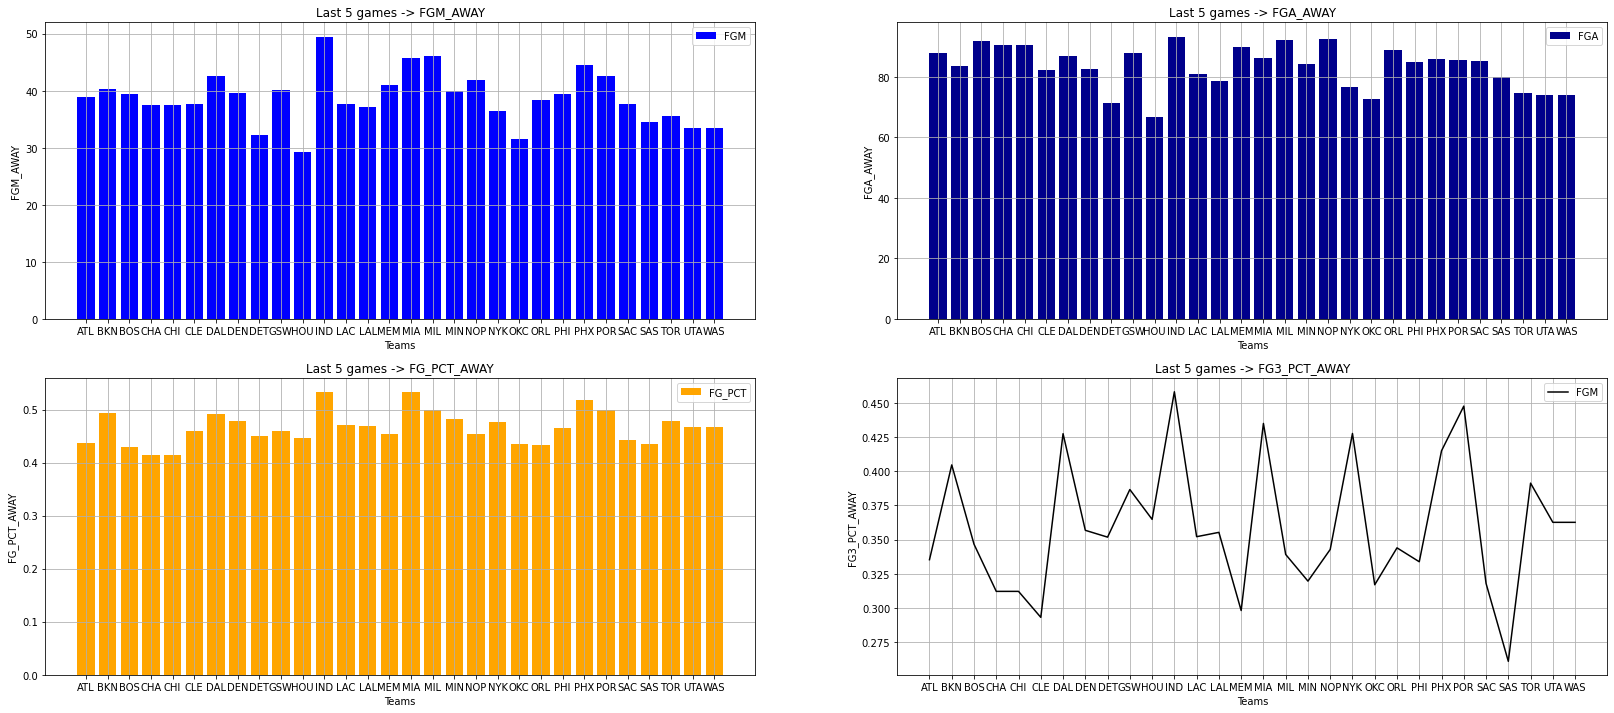

In [ ]:
plt.figure(figsize=(28,12))
plt.subplot(221)
plt.title("Last 5 games -> FGM_AWAY")
plt.bar(Concat2['team'], Concat2['FGM_AWAY'] , color = 'blue', width = 0.8, label="FGM")
plt.xlabel('Teams')
plt.ylabel('FGM_AWAY')
plt.grid(True)
plt.legend()
plt.subplot(222)
plt.title("Last 5 games -> FGA_AWAY")
plt.bar(Concat2['team'], Concat2['FGA_AWAY'] , color = 'darkblue', width = 0.8, label="FGA")
plt.xlabel('Teams')
plt.ylabel('FGA_AWAY')
plt.grid(True)
plt.legend()
plt.subplot(223)
plt.title("Last 5 games -> FG_PCT_AWAY")
plt.bar(Concat2['team'], Concat2['FG_PCT_AWAY'] , color = 'orange', width = 0.8, label="FG_PCT")
plt.xlabel('Teams')
plt.ylabel('FG_PCT_AWAY')
plt.grid(True)
plt.legend()
plt.subplot(224)
plt.title("Last 5 games -> FG3_PCT_AWAY")
plt.plot(Concat2['team'], Concat2['FG3_PCT_AWAY'] , color = 'black', label="FGM") #
plt.xlabel('Teams')
plt.ylabel('FG3_PCT_AWAY')
plt.grid(True)
plt.legend(); 

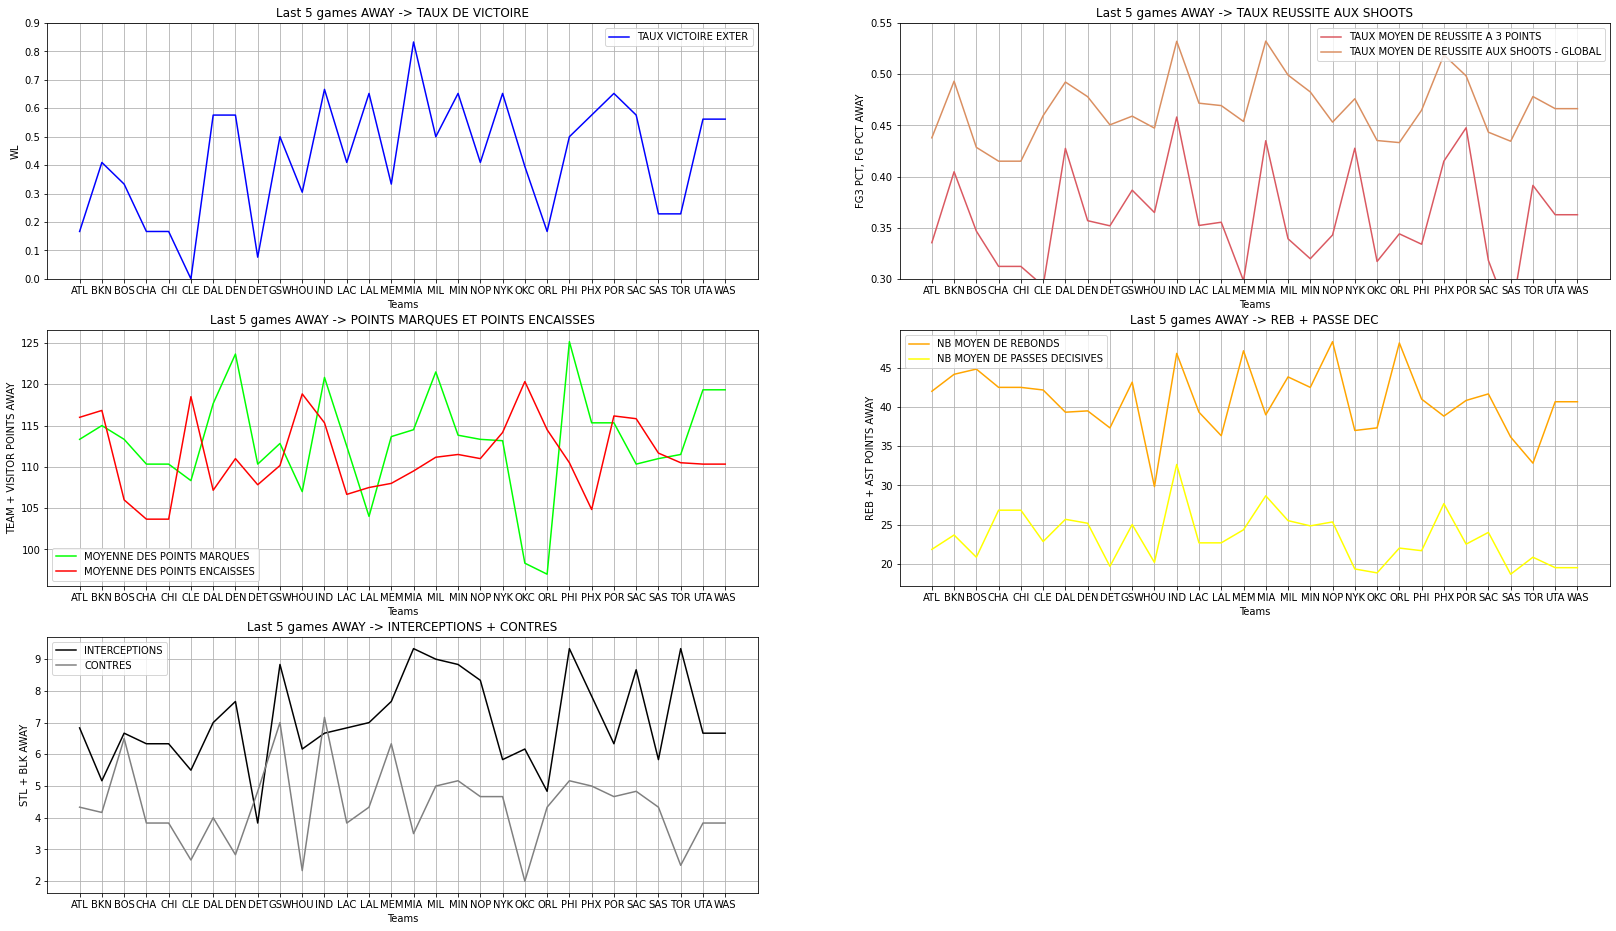

In [ ]:
plt.figure(figsize=(28,16))
plt.subplot(321)
plt.title("Last 5 games AWAY -> TAUX DE VICTOIRE")
plt.plot(Concat2['team'], Concat2['WL_AWAY'] , color = 'blue', label="TAUX VICTOIRE EXTER") #, width = 0.8
plt.ylim([0,.9])
plt.xlabel('Teams')
plt.ylabel('WL')
plt.grid(True)
plt.legend()
plt.subplot(322)
plt.title("Last 5 games AWAY -> TAUX REUSSITE AUX SHOOTS")
plt.plot(Concat2['team'], Concat2['FG3_PCT_AWAY'] , color = '#da5961', label="TAUX MOYEN DE REUSSITE A 3 POINTS")
plt.plot(Concat2['team'], Concat2['FG_PCT_AWAY'] , color = '#da8f61', label="TAUX MOYEN DE REUSSITE AUX SHOOTS - GLOBAL")
plt.ylim([.3,.55])
plt.xlabel('Teams')
plt.ylabel('FG3 PCT, FG PCT AWAY')
plt.grid(True)
plt.legend()
plt.subplot(323)
plt.title("Last 5 games AWAY -> POINTS MARQUES ET POINTS ENCAISSES")
plt.plot(Concat2['team'], Concat2['LAST_GAME_VISITOR_TEAM_POINTS'] , color = 'lime', label="MOYENNE DES POINTS MARQUES") #
plt.plot(Concat2['team'], Concat2['LAST_GAME_HOME_TEAM_POINTS'] , color = 'red', label="MOYENNE DES POINTS ENCAISSES")
plt.xlabel('Teams')
plt.ylabel('TEAM + VISITOR POINTS AWAY')
plt.grid(True)
plt.legend()
plt.subplot(324)
plt.title("Last 5 games AWAY -> REB + PASSE DEC")
plt.plot(Concat2['team'], Concat2['REB_AWAY'] , color = 'orange', label="NB MOYEN DE REBONDS")
plt.plot(Concat2['team'], Concat2['AST_AWAY'] , color = 'yellow', label="NB MOYEN DE PASSES DECISIVES") 
plt.xlabel('Teams')
plt.ylabel('REB + AST POINTS AWAY')
plt.grid(True)
plt.legend()
plt.subplot(325)
plt.title("Last 5 games AWAY -> INTERCEPTIONS + CONTRES")
plt.plot(Concat2['team'], Concat2['STL_AWAY'] , color = 'black', label="INTERCEPTIONS")
plt.plot(Concat2['team'], Concat2['BLK_AWAY'] , color = 'gray', label="CONTRES") 
plt.xlabel('Teams')
plt.ylabel('STL + BLK AWAY')
plt.grid(True)
plt.legend(); 

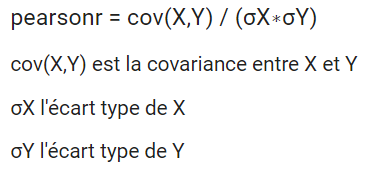

In [ ]:
# tests statistique HOME
# test unitaire pour débuter
pd.DataFrame(stats.pearsonr(Concat2['WL_AWAY'],Concat2['FG_PCT_AWAY']), index = ['pearson_coeff','p-value'], columns = ['resultat_test_1'])
#la p-value < 5%, le coefficient proche de 1, il y a une forte corrélation entre les deux variables

,resultat_test_1
pearson_coeff,0.701169
p-value,0.000016


In [ ]:
def calculate_pearson(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pearson = dfcols.transpose().join(dfcols, how='outer')
    for row in df.columns:
        for col in df.columns:
            pearson[row][col] = round(stats.pearsonr(df[row], df[col])[0], 7)
    return pearson

In [ ]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for row in df.columns:
        for col in df.columns:
            pvalues[row][col] = round(stats.pearsonr(df[row], df[col])[1], 7)
    return pvalues

In [ ]:
# COEFFICIENTS PEARSONS de Concat
Concat2_Pearson_Values = calculate_pearson(Concat2)
Concat2_Pearson_Values

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_SEQUENCE,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES
WL_AWAY,1,-0.054447,0.455035,0.0668798,0.701169,0.481069,0.17399,0.601166,-0.211764,-0.269287,0.25003,-0.33258,0.168343,-0.0248717,0.325293,0.495695,0.240129,-0.270429,0.119194,0.421609,0.79706,-0.150275,0.311613,0.0203425,-0.27135,0.383807,0.819146,-0.0010929,-0.0765057,-0.519386,-0.317369,-0.335709,-0.428837,0.287931,0.588679,0.700956,0.17959,0.0584498,-0.0280863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0169208,0.440212,-0.698623,0.521916
MIN_AWAY,-0.054447,1,0.730754,0.907916,0.0738084,0.230126,0.311566,0.0085803,0.64686,0.512358,-0.0029002,0.445028,0.700576,0.748685,0.649083,0.238595,0.485754,0.251005,0.717126,0.758535,0.131219,0.932472,-0.659629,0.721701,0.564253,0.461457,0.148901,0.124938,0.126751,-0.0544918,0.196424,0.520654,0.263134,-0.503398,0.110088,0.167046,0.629549,0.884085,0.307767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.305266,0.2276,-0.120354,0.570841
FGM_AWAY,0.455035,0.730754,1,0.803208,0.656876,0.448271,0.214131,0.455234,0.421094,0.263169,0.205251,0.0636221,0.694833,0.566547,0.820258,0.429112,0.545494,-0.0442923,0.649042,0.973334,0.566909,0.613474,-0.411473,0.71273,0.230059,0.714514,0.535977,0.179476,0.0899853,-0.36243,-0.104551,0.119781,-0.0568105,-0.28925,0.497815,0.581071,0.798112,0.803579,0.25263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.175599,0.469222,-0.477518,0.656923
FGA_AWAY,0.0668798,0.907916,0.803208,1,0.0861257,0.236362,0.313074,0.0143188,0.592785,0.491869,-0.0268447,0.484707,0.745924,0.802213,0.702551,0.302809,0.5931,0.0763674,0.666012,0.806315,0.243261,0.778853,-0.628695,0.739786,0.481957,0.573,0.208485,0.123732,0.0820774,-0.312926,-0.002839,0.5222,0.0350433,-0.441086,0.226576,0.225404,0.715971,0.828678,0.307204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.301678,0.243267,-0.192904,0.56276
FG_PCT_AWAY,0.701169,0.0738084,0.656876,0.0861257,1,0.497364,0.0325012,0.753819,-0.0310095,-0.182521,0.408954,-0.47249,0.242699,-0.0326012,0.489743,0.34261,0.160495,-0.193473,0.227828,0.621301,0.695724,0.0247445,0.136216,0.220354,-0.200139,0.449781,0.688209,0.138468,0.0579808,-0.231186,-0.200782,-0.479298,-0.184686,0.0939578,0.578754,0.72509,0.44906,0.26932,0.0388906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0605105,0.507322,-0.590567,0.429742
FG3M_AWAY,0.481069,0.230126,0.448271,0.236362,0.497364,1,0.762593,0.761935,-0.0211563,-0.195338,0.299694,-0.297817,0.298084,0.0915773,0.450562,0.221297,0.235233,-0.105292,0.304277,0.567132,0.671963,0.219819,-0.206924,-0.148595,-0.0484996,0.182158,0.583816,0.220891,0.367518,-0.308671,-0.129818,-0.142163,-0.162454,-0.118602,0.46614,0.636925,0.484422,0.275809,-0.0937992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.139648,0.340563,-0.440036,0.454812
FG3A_AWAY,0.17399,0.311566,0.214131,0.313074,0.0325012,0.762593,1,0.18335,0.0884009,0.0048385,0.0123229,0.124542,0.264563,0.262456,0.350988,0.268063,0.183205,0.15038,0.217252,0.352507,0.404948,0.258408,-0.225038,-0.136726,0.226763,0.0508573,0.372537,0.0058746,0.234353,-0.176212,0.0923321,0.228495,-0.0166162,-0.0764787,0.379312,0.281427,0.202481,0.254256,-0.128924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.26904,0.195617,-0.310498,0.445288
FG3_PCT_AWAY,0.601166,0.0085803,0.455234,0.0143188,0.753819,0.761935,0.18335,1,-0.103857,-0.267275,0.396001,-0.538924,0.201765,-0.0951832,0.343543,0.0784656,0.162334,-0.292708,0.239547,0.504382,0.673852,0.0317106,-0.025801,-0.0

In [ ]:
# P_VALUES de Concat
Concat2_p_Values = calculate_pvalues(Concat2)
Concat2_p_Values

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_SEQUENCE,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES
WL_AWAY,0,0.775063,0.0115192,0.72548,1.59e-05,0.0071192,0.357818,0.0004425,0.261271,0.150147,0.182676,0.0725387,0.373874,0.896203,0.0794207,0.0053442,0.201195,0.14836,0.530426,0.0203146,1e-07,0.427993,0.0936825,0.915029,0.146927,0.036276,0,0.995427,0.687814,0.0032686,0.0874627,0.0697289,0.0180512,0.122847,0.0006216,1.6e-05,0.34231,0.758994,0.882874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.929283,0.0149141,1.76e-05,0.003095
MIN_AWAY,0.775063,0,4.5e-06,0,0.698299,0.221181,0.0937353,0.964107,0.0001122,0.0037956,0.987865,0.01373,1.63e-05,2e-06,0.0001043,0.204176,0.006503,0.180919,8.2e-06,1.2e-06,0.489454,0,7.34e-05,6.8e-06,0.001163,0.0102642,0.432276,0.510651,0.504488,0.774882,0.298191,0.0031806,0.16005,0.0045719,0.562509,0.377617,0.0001935,0,0.0980226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100925,0.226433,0.526405,0.0009869
FGM_AWAY,0.0115192,4.5e-06,0,1e-07,8.05e-05,0.0129778,0.255853,0.0114785,0.0204842,0.159993,0.276564,0.738376,2.04e-05,0.0010988,0,0.0179692,0.0018229,0.816224,0.0001044,0,0.001089,0.0003122,0.0238778,9.9e-06,0.221319,9.2e-06,0.0022675,0.342622,0.636293,0.0490381,0.582439,0.528391,0.765564,0.121064,0.0051213,0.0007595,1e-07,1e-07,0.178017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.353319,0.0089021,0.0076186,8.04e-05
FGA_AWAY,0.72548,0,1e-07,0,0.650889,0.208571,0.092073,0.940137,0.0005567,0.0057674,0.888019,0.0066367,2.2e-06,1e-07,1.5e-05,0.103837,0.000552,0.68835,5.89e-05,1e-07,0.195203,4e-07,0.0001986,3e-06,0.0069987,0.0009345,0.268899,0.514774,0.666335,0.0922357,0.988121,0.003076,0.854139,0.014693,0.228585,0.231066,8.6e-06,0,0.0986698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105201,0.19519,0.307106,0.0012065
FG_PCT_AWAY,1.59e-05,0.698299,8.05e-05,0.650889,0,0.0051681,0.864619,1.5e-06,0.87078,0.334359,0.0248386,0.0083764,0.19627,0.864207,0.0060146,0.0638314,0.396868,0.305652,0.225956,0.0002481,1.97e-05,0.896731,0.472916,0.241962,0.28896,0.0126396,2.63e-05,0.465562,0.760872,0.219002,0.287384,0.0073648,0.328558,0.621408,0.0008066,5.8e-06,0.0128,0.150095,0.838323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75076,0.0042167,0.000591,0.0177831
FG3M_AWAY,0.0071192,0.221181,0.0129778,0.208571,0.0051681,0,1e-06,1e-06,0.911643,0.300924,0.107622,0.109951,0.109618,0.630311,0.0124675,0.239902,0.210815,0.579753,0.10209,0.0010829,4.78e-05,0.243136,0.272582,0.433234,0.799105,0.335338,0.000707,0.240788,0.0457182,0.0969883,0.494146,0.453622,0.391055,0.532485,0.0094232,0.000154,0.0066734,0.14014,0.622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.461731,0.0655382,0.0149587,0.011565
FG3A_AWAY,0.357818,0.0937353,0.255853,0.092073,0.864619,1e-06,0,0.33213,0.642269,0.979755,0.948469,0.512006,0.157709,0.161169,0.057203,0.152081,0.332519,0.427665,0.248822,0.0560614,0.0264317,0.167966,0.231846,0.471246,0.228191,0.789551,0.0426211,0.975422,0.212578,0.351615,0.627482,0.224563,0.930553,0.687919,0.0387086,0.131919,0.283238,0.175148,0.497148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150536,0.30022,0.0949253,0.0136684
FG3_PCT_AWAY,0.0004425,0.964107,0.0114785,0.940137,1.5e-06,1e-06,0.33213,0,0.584956,0.153336,0.0302913,0.0021208,0.284979,0.616846,0.0630647,0.680231,0.391409,0.116483,0.202322,0.0044805,4.46e-05,0.867884,0.892347,0.675529,0.240474,0.149105,0.0013532,0.122466,0.104883,0.116845,0.145871,0.0108647,0.233486,0.962294,0.0363317,7.5e-06,0.0073525,0.470189,0.938629,NaN,N

In [ ]:
# OBSERVATION DES P VALUES SIGNIFICATIVES DE CORRELATIONS ENTRE VARIABLES HOME
Concat2_relevant_correlations = Concat2_p_Values[Concat2_p_Values < 0.00005]

In [ ]:
Concat2_relevant_correlations.info()

In [ ]:
#pd.to_numeric(Concat_relevant_correlations, errors='raise')

obj_cols2 = Concat2_relevant_correlations.loc[:, Concat2_relevant_correlations.dtypes == object]
conv_cols2 = obj_cols2.apply(pd.to_numeric, errors = 'coerce')

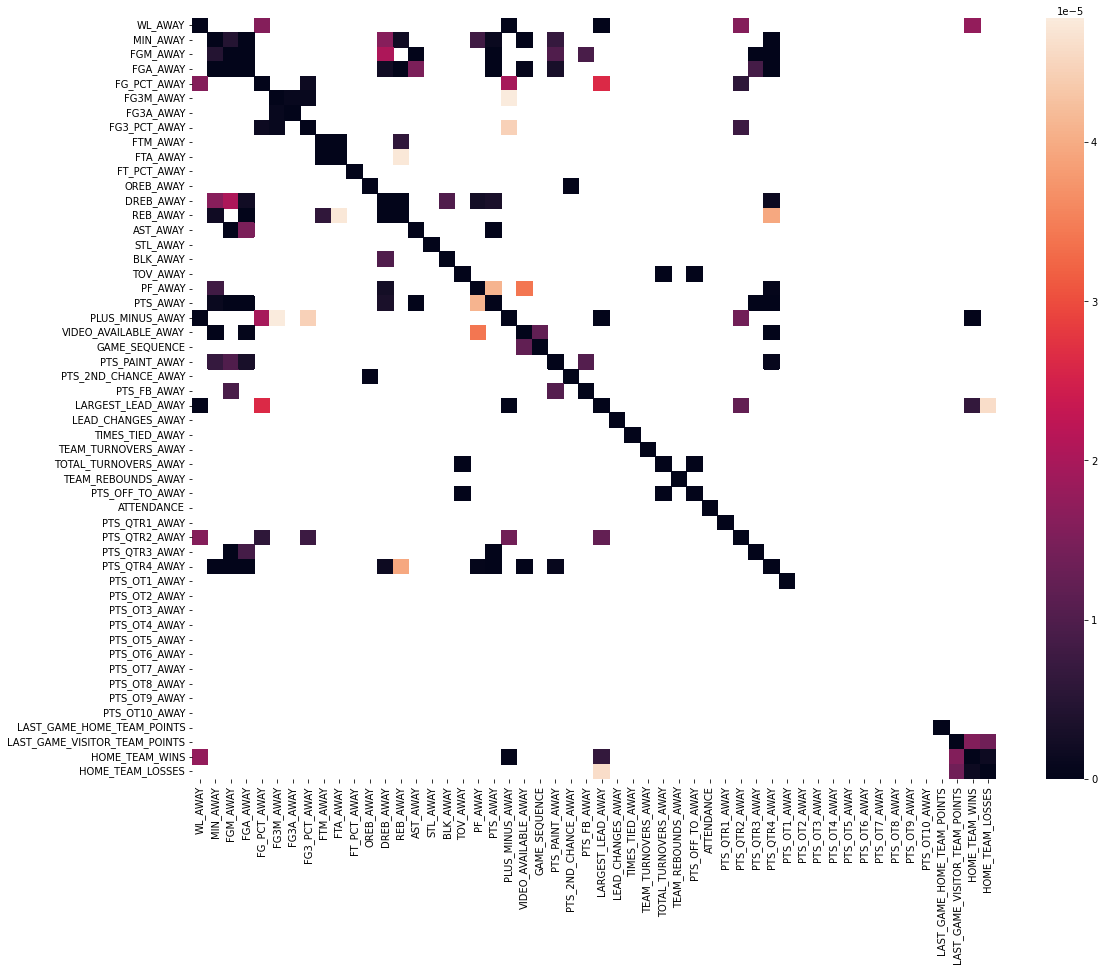

In [ ]:
plt.figure (figsize=(18,14))
sns.heatmap(conv_cols2);

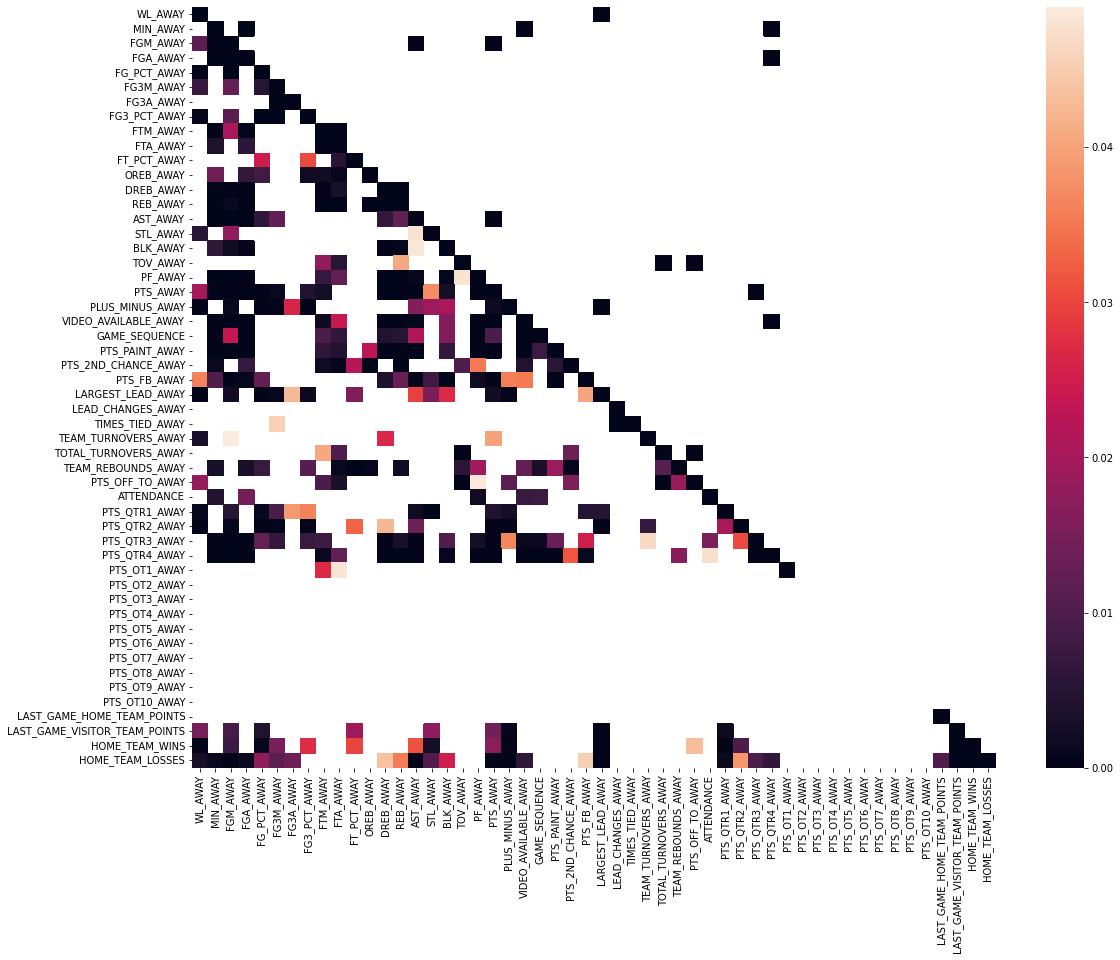

In [ ]:
plt.figure(figsize=(18,14))
matrix = np.triu(conv_cols2)
sns.heatmap(conv_cols2, annot=False, mask=matrix)
plt.show();